<a href="https://colab.research.google.com/github/DrewFinley/IMSE-441/blob/main/Lab_8_Drew_Finley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=afcd4773ac28c4e9eb31efd557bae50df1726c418c286d1a63255fd1f3274db9
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import pingouin as pg

In [3]:
# Initiate the power analysis
power_analysis = TTestIndPower()
d = .02/.02456
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = d, alpha = 0.05, power = 0.9, alternative = 'larger')#effect size= d ratio, #alternative= 'two-sided', 'larger', 'smaller'
# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 27


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)


In [4]:
power = power_analysis.solve_power(effect_size = d, alpha = .05, nobs1=27, alternative = 'larger')
print('power: ', power)

power:  0.9045474618151641


#Two Sample Test with Var Equal


In [5]:
#Two different catalyst performance test. Sample 2 is cheaper. Will it be a good decision to catalyst 1 by catalyst 2?
Samp_1= 91.5, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21
Samp_2= 89.19, 90.95, 90.46,	93.21,	97.19,	97.04,	91.07,	92.75

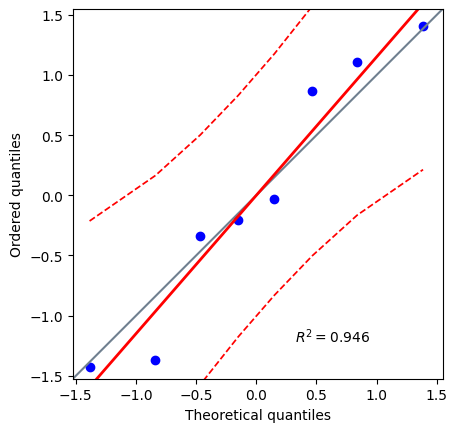

In [6]:
#Normality check
pg.qqplot(Samp_1)
plt.show()

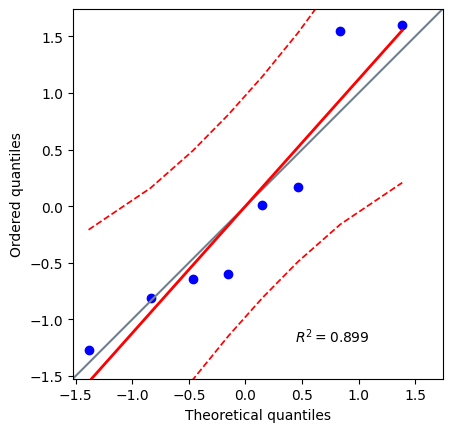

In [7]:
#Normality check
pg.qqplot(Samp_2)
plt.show()

In [8]:
#Hypothesis test
ttest_ind(a=Samp_1, b= Samp_2, equal_var= True)
     

Ttest_indResult(statistic=-0.35359086434617987, pvalue=0.7289136186068217)

As the pvalue is much larger than alpha, we should fail to reject H0. The true means of the samples are equal. 

#Two sample test Var Unequal

In [9]:

# two sample test Variance unequal
# Drinking water Arsenic concentration in Arizona
Samp_1 = 3, 7, 25, 10, 15, 6, 12, 25, 15, 7
Samp_2 = 48, 44, 40, 38, 33, 21, 20, 12, 1, 18
     

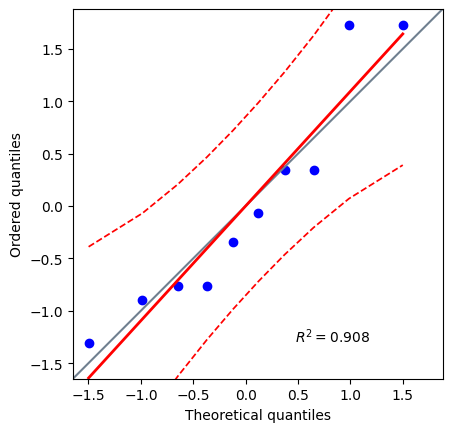

In [10]:
#Normality check
pg.qqplot(Samp_1)
plt.show()
     

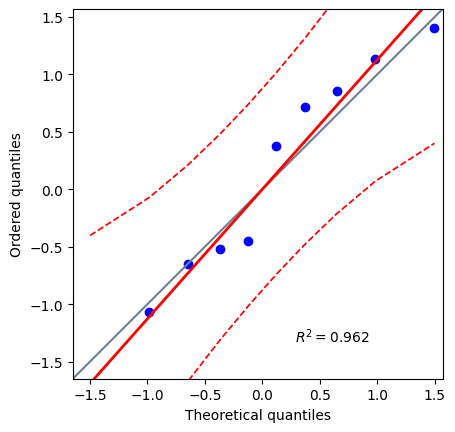

In [11]:
#Normality check
pg.qqplot(Samp_2)
plt.show()
     

In [12]:
#Hypothesis test
ttest_ind(a=Samp_1, b= Samp_2, equal_var= False)

Ttest_indResult(statistic=-2.7669395785560553, pvalue=0.0158272848161009)

The pvalue is much lower than alpha so H0 should be rejected, the means of the samples are unequal. 

# Paired T-Test

In [13]:
from scipy.stats import ttest_rel

In [14]:
#Paired t test
#Test of shear strength for same steel blades by two different methods 
Samp_1= 1.186, 1.151, 1.322, 1.339, 1.200, 1.402, 1.365, 1.537, 1.559
Samp_2= 1.061, 0.992, 1.063, 1.062, 1.065, 1.178, 1.037, 1.086, 1.052

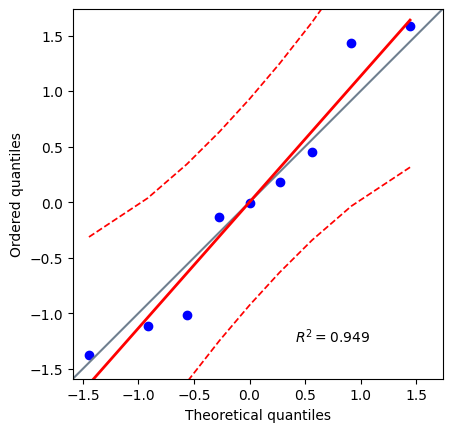

In [15]:
#Normality check
pg.qqplot(Samp_1)
plt.show()
     

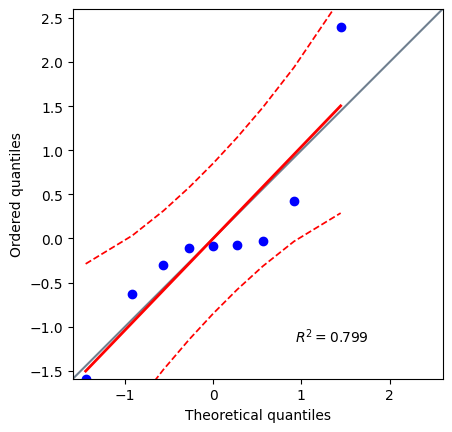

In [16]:
#Normality check
pg.qqplot(Samp_2)
plt.show()
     

In [17]:
#Hypothesis test for Paired samples
ttest_rel(a=Samp_1, b= Samp_2)

TtestResult(statistic=6.0819394375848255, pvalue=0.00029529546278604066, df=8)

In [18]:

#confidence interval for Paired samples
ttest_rel(a=Samp_1, b= Samp_2).confidence_interval(confidence_level=.95)

ConfidenceInterval(low=0.17004225956956093, high=0.37773551820821677)

The pvalue is much lower than alpha so we reject H0 and the true means are not equal. 

# Question 1


In [19]:
#A
power_analysis = TTestIndPower()
d = 10/20 
alpha = power_analysis.solve_power(effect_size = d, nobs1 = 10, alpha = None, power = 0.9, alternative = 'larger')
alpha

0.5651090324011577

In [20]:
#B 
power_analysis = TTestIndPower()
d = 10/20
power = power_analysis.solve_power(effect_size = d, alpha = alpha, nobs1=10, alternative = 'larger')
power

0.8999992696209291

In [21]:
#C
power_analysis = TTestIndPower()
d = 40/20
power = power_analysis.solve_power(effect_size = d, alpha = alpha, nobs1=10, alternative = 'larger')
beta = 1 - power
beta

1.7899392183995388e-06

In [22]:
#D
power_analysis = TTestIndPower()
d = 10/20
sample_size = power_analysis.solve_power(effect_size = d, alpha = 0.05, power = 0.9, alternative = 'larger')
print(round(sample_size))

69


No the sample size is not large enought to accomodate a power of .9. 

# Question 2

In [23]:
x = [97.8, 97.2, 97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3, 98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9, 99.0]

In [24]:
#A
ttest_1samp(a=x, popmean= 98.6)

TtestResult(statistic=-3.484907217309078, pvalue=0.0019124143827446436, df=24)

The pvalue is very low, way less than .05 so we reject H0 and the mean is not equal to 98.6.

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

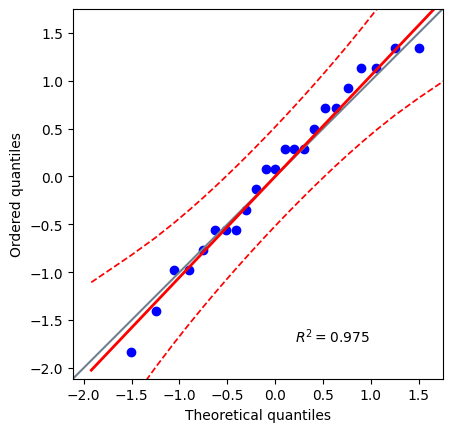

In [25]:
#B
pg.qqplot(x)

The data is clearly normally distributed as it follows the line almost perfectly and the R-squared value is very high.

In [26]:
x_var = np.var(x)
x_std = np.sqrt(x_var)

In [27]:
#C
d = .6/x_std
power = power_analysis.solve_power(effect_size = d, alpha = .05, nobs1=25, alternative = 'larger')
print('power: ', power)

power:  0.9972968642231435


In [28]:
#D 
power_analysis = TTestIndPower()
d = .4/x_std
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = d, alpha = 0.05, power = 0.9, alternative = 'larger')#effect size= d ratio, #alternative= 'two-sided', 'larger', 'smaller'
# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 25


# Question 3

In [29]:
Low = [242,249,235,250,254,244,258,311,237,261,314,252]
High = [302,421,419,399,317,311,350,363,392,367,301,302]

In [30]:
#A 
#H0 = 0 , H1 != 0
ttest_ind(a=High, b=Low, equal_var= True)

Ttest_indResult(statistic=6.138840596507603, pvalue=3.529500405795358e-06)

The pvalue is very very small and so H0 should be rejected and the means are not equal. The mean increases with a higher vibration level. 

In [31]:
#B 
res = pg.ttest(High, Low, correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.138841,22,two-sided,0.000004,"[62.74, 126.76]",2.506171,3675.29,0.999951


The mean difference is between 62.74 and 126.76 with 95% confidence. 

###C 
The value 0 is not in the CI further proving our initial result from part A. The mean difference between the two grinding wheels is not 0. The fact that the difference is positive shows that the higher the vibration level, the higher the grinding force. 


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

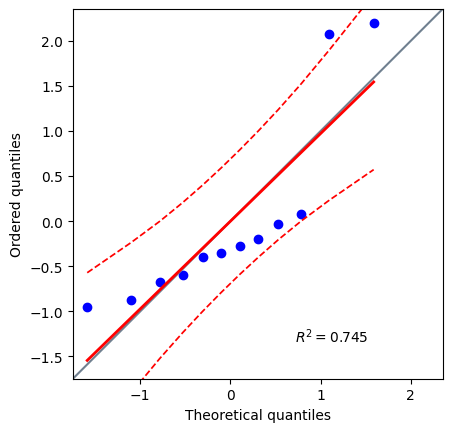

In [32]:
#D 
pg.qqplot(Low)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

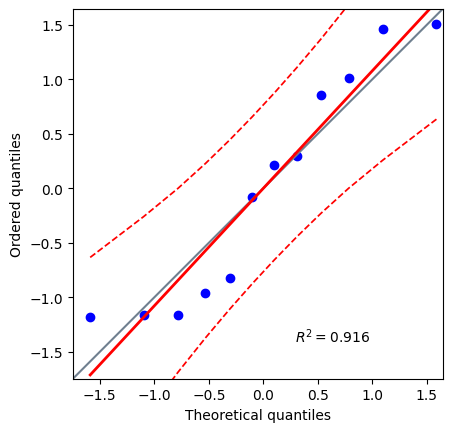

In [33]:
pg.qqplot(High)

The normality plot for the Low data is concerning as the R-squared value is very low. This shows that the normality assumption was violated with the Low data. Other tests need to be used or more data needs to be gathered to hopefully approach normality. 

# Question 4


In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-441/main/Lab_8_Data.csv')
df.set_index('Unnamed: 0')
df.rename({'Unnamed: 0': 'Student'}, axis=1, inplace=True)
df

,Student,Grades before Lab,Grades after Lab
0,Student _1,22,24
1,Student _2,20,22
2,Student _3,19,19
3,Student _4,24,22
4,Student _5,25,28
5,Student _6,25,26
6,Student _7,28,28
7,Student _8,22,24
8,Student _9,30,30
9,Student _10,27,29


In [35]:
before = df["Grades before Lab"]
after = df["Grades after Lab"]
before

0     22
1     20
2     19
3     24
4     25
5     25
6     28
7     22
8     30
9     27
10    24
11    18
12    16
13    19
14    19
15    28
16    24
17    25
18    25
19    23
Name: Grades before Lab, dtype: int64

In [36]:
after

0     24
1     22
2     19
3     22
4     28
5     26
6     28
7     24
8     30
9     29
10    25
11    20
12    17
13    18
14    18
15    28
16    26
17    27
18    27
19    24
Name: Grades after Lab, dtype: int64

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

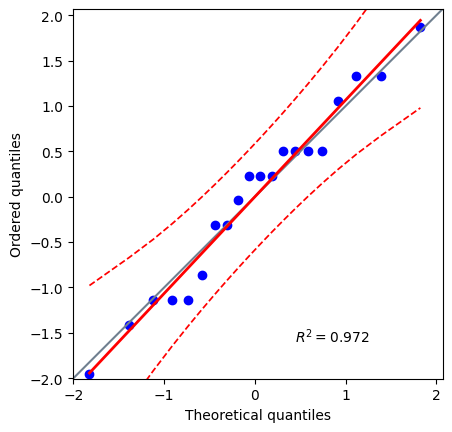

In [37]:
pg.qqplot(before)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

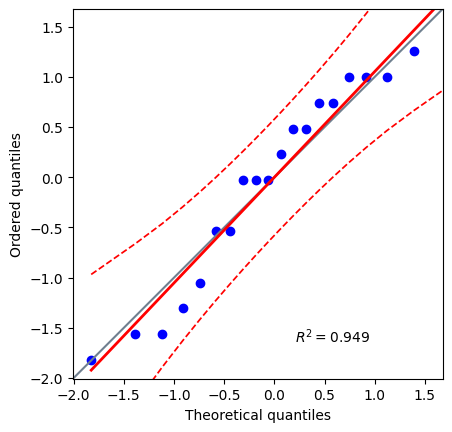

In [38]:
pg.qqplot(after)

In [39]:
ttest_rel(a=before, b=after)

TtestResult(statistic=-3.22617331116718, pvalue=0.004445370704412229, df=19)

The lab training showed a change. The pvalue is much lower than .05 so H0 is rejected and the lab training had an impact on the survey score. 